In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering as AGGC

In [3]:
# Load the Spotify dataset
# Ensure the .csv file is in the correct directory or provide a full path to the file
tracks_df = pd.read_csv("/Users/vedant/Downloads/spotify_tracks.csv")

In [75]:
tracks_df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [76]:
tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [77]:
tracks_df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [5]:
# Select only necessary features for clustering
tracks = tracks_df[["acousticness","danceability","energy","instrumentalness","liveness","speechiness","valence"]]

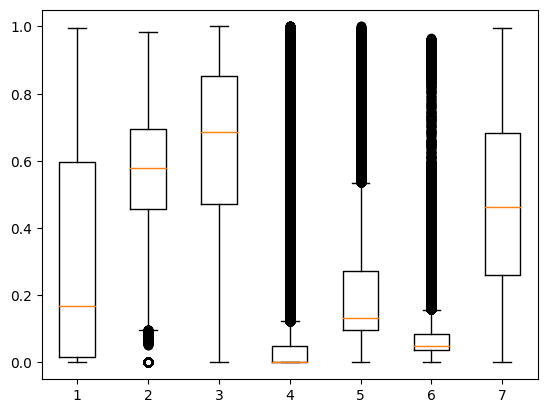

In [6]:
plt.boxplot(tracks)
plt.show()

In [80]:
# Handle outlier for danceability, symbolized by the black dot at position 2
outliers = np.where(tracks['danceability']<0.)
for i in outliers:
    tracks.loc[i,'danceability'] = tracks['danceability'].quantile(0.50)

C:\Users\bhawa\AppData\Local\Temp\ipykernel_34236\1727182072.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tracks.loc[i,'danceability'] = tracks['danceability'].quantile(0.50)


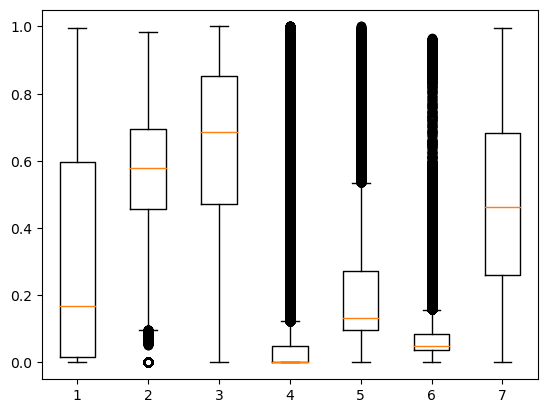

In [81]:
#Check to see if outliers are handled
plt.boxplot(tracks)
plt.show()

C:\Users\bhawa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\bhawa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\bhawa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\bhawa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\bhawa\anaconda3\Lib\site-packages\sklearn\clust

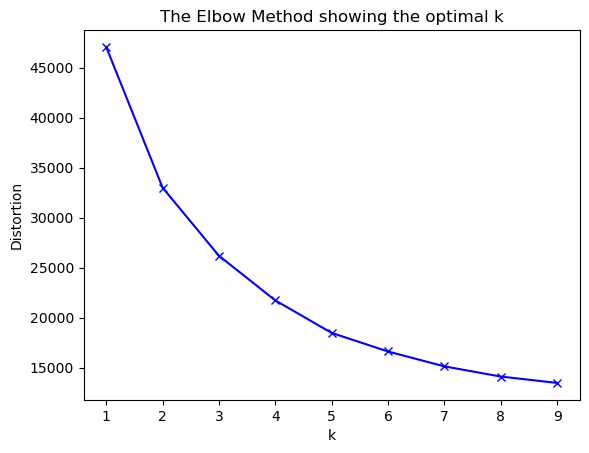

In [71]:
#Graph K and distortion as an elbow curve as a way to decide the number of clusters
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(tracks)
    distortions.append(kmeanModel.inertia_)
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
###EXPLANATION: The graph above describes on how many clusters or groups of data should the data be grouped within for the least differences in points AKA distortion. The less the distortion the better because it better shows our graph with the least amount of differences.

In [ ]:
#Find the curving point where graph looks to change in distorition the most
n_clusters = 5

In [8]:
# Train the model with our data
kmeans.fit(tracks)

C:\Users\bhawa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [9]:
# Add a new column 'type' to the dataframe. This column will contain the cluster number each track belongs to.
tracks_df["type"] = kmeans.labels_
tracks_df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,type
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,4
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,0
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,3
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,0
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,0


In [10]:
# Save the dataframe with cluster information as a new CSV file
tracks_df.to_csv("result.csv", index=False)

# Load the updated data with cluster info
tracks = pd.read_csv("result.csv")

In [11]:
### Prompt the user to enter their favorite songs' acousticness, danceability, and energy
acoustic = input('Enter the acoustic level of your favorite songs\n> ').strip().split(',')
dance = input('Enter the danceability level of your favorite songs\n> ').strip().split(',')
energy = input('Enter the energy level of your favorite songs\n> ').strip().split(',')
acoustic2 = []
dance2 = []
energy2 = []
for i in acoustic:
    acoustic2.append(float(i))
for i in dance:
    dance2.append(float(i))
for i in energy:
    energy2.append(float(i))
# Filter the dataframe to get the user's favorite songs for each feature
favorite1 = tracks_df[tracks_df['acousticness'].isin(acoustic2)]
favorite2 = tracks_df[tracks_df['danceability'].isin(dance2)]
favorite3 = tracks_df[tracks_df['energy'].isin(energy2)]

Enter the acoustic level of your favorite songs
> 0.0322
Enter the danceability level of your favorite songs
> 0.676
Enter the energy level of your favorite songs
> 0.4610


In [12]:
# Find out the most frequent cluster among the user's favorite songs
type_list = []
for i in list(favorite3['type']):
    type_list.append(i)
for i in list(favorite2['type']):
    type_list.append(i)
for i in list(favorite1['type']):
    type_list.append(i)
count_list = {}
for i in type_list:
    count_list[i] = type_list.count(i)
for i in count_list:
    if count_list[i] == max(count_list.values()):
        user_favorite_cluster = i
print(count_list)
print(user_favorite_cluster)

print('\nFavorite cluster:', user_favorite_cluster, '\n')

{4: 135, 0: 87, 3: 66, 2: 35, 1: 15}
4

Favorite cluster: 4 



In [13]:
# Get the songs that belong to the user's favorite cluster
suggestions = tracks[tracks['type'] == user_favorite_cluster]

# Print the first 5 song suggestions
print(suggestions.head())

    Unnamed: 0                track_id                    artists  \
0            0  5SuOikwiRyPMVoIQDJUgSV                Gen Hoshino   
5            5  01MVOl9KtVTNfFiBU9I7dc               Tyrone Wells   
8            8  0IktbUcnAGrvD03AWnz3Q8  Jason Mraz;Colbie Caillat   
18          18  2qLMf6TuEC3ruGJg4SMMN6  Jason Mraz;Colbie Caillat   
24          24  3Hn3LfhrQOaKihdCibJsTs                 Jason Mraz   

                             album_name            track_name  popularity  \
0                                Comedy                Comedy          73   
5                  Days I Will Remember  Days I Will Remember          58   
8   We Sing. We Dance. We Steal Things.                 Lucky          74   
18  We Sing. We Dance. We Steal Things.                 Lucky          68   
24         Human - Best Adult Pop Tunes              Unlonely           0   

    duration_ms  explicit  danceability  energy  ...  mode  speechiness  \
0        230666     False         0.676   0.461

In [ ]:
#Prompt user for input of data
rate_song = input('Which songs will you like to rate for suggestions?(ENTER ID NAME): ').strip().split(',')
ratings = input('Enter rating of each song inputed out of 10 in the same order respectively: ').strip().split(',')
rating_score = {}
for i in rate_song:
    for j in ratings:
        if rate_song.index(i) == ratings.index((j)):
            rating_score[i] = j
#Display scores
print(rating_score)